In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.callbacks import LearningRateScheduler
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.impute import KNNImputer


df = pd.read_csv('/Users/amitvallahkeshav/Downloads/Almond.csv')
df.head()
print(df)
def plot_histograms(df):
    df.hist(figsize=(8, 8), bins=30)
    plt.suptitle('Feature Distributions', fontsize=12)
    plt.tight_layout()  
    plt.show()
plot_histograms(df)

In [2]:
df = df.drop('Unnamed: 0', axis=1)
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n",)
    
    return  df.describe().transpose()

# Call the function
get_df_info(df)


Shape of DataFrame:  (2803, 13)

Columns in DataFrame:  ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)', 'Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness', 'Aspect Ratio', 'Eccentricity', 'Extent', 'Convex hull(convex area)', 'Type']

Data types of columns:
 Length (major axis)         float64
Width (minor axis)          float64
Thickness (depth)           float64
Area                        float64
Perimeter                   float64
Roundness                   float64
Solidity                    float64
Compactness                 float64
Aspect Ratio                float64
Eccentricity                float64
Extent                      float64
Convex hull(convex area)    float64
Type                         object
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    -------

,count,mean,std,min,25%,50%,75%,max
Length (major axis),1946.0,290.609274,62.719433,151.335266,245.966293,279.879883,330.508575,515.352478
Width (minor axis),1861.0,171.025915,29.916529,88.050529,149.453659,170.168365,190.640427,258.569794
Thickness (depth),1799.0,109.705378,18.940597,59.494278,97.091682,110.280136,121.392773,181.845200
Area,2803.0,26511.117374,13782.561344,6037.000000,16211.500000,23440.500000,33451.000000,89282.000000
Perimeter,2803.0,743.863770,230.632076,311.563489,571.730009,707.487369,878.896530,1864.947387
Roundness,1946.0,0.470466,0.118673,0.173748,0.384810,0.472718,0.577553,0.697293
Solidity,2803.0,0.955828,0.039596,0.718772,0.944579,0.970422,0.981484,0.992889
Compactness,2803.0,1.825233,0.794058,1.164469,1.357398,1.576412,1.965953,9.660057
Aspect Ratio,1004.0,1.753216,0.206616,1.400082,1.612490,1.705716,1.833339,2.731251
Eccentricity,1004.0,0.813114,0.041312,0.699897,0.784476,0.810120,0.838141,0.930563


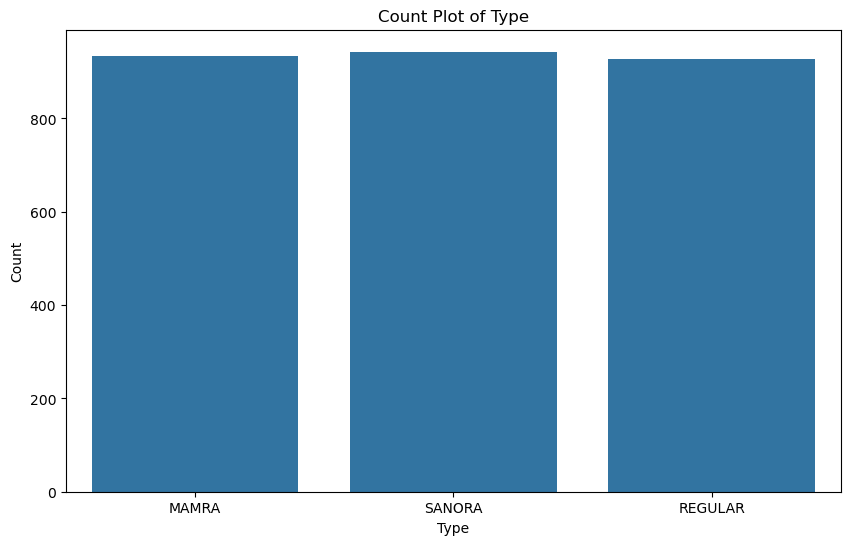

In [3]:
# Create a count plot for the 'Type' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df)

# Set title and labels
plt.title('Count Plot of Type')
plt.xlabel('Type')
plt.ylabel('Count');

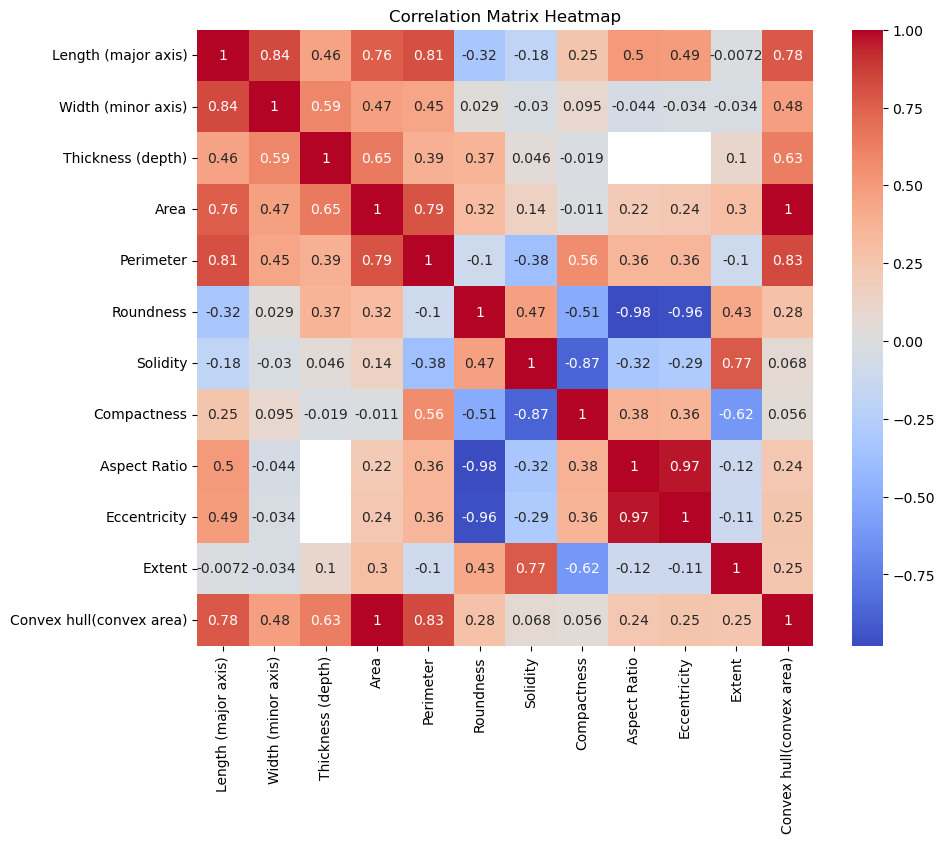

In [4]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Set title
plt.title('Correlation Matrix Heatmap');


In [5]:
# calculate percentage of null values in each column
null_percentages = df.isnull().mean() * 100

# sort in descending order
null_percentages = null_percentages.sort_values(ascending=False)

# print the result
print(null_percentages)

Aspect Ratio                64.181234
Eccentricity                64.181234
Thickness (depth)           35.818766
Width (minor axis)          33.606850
Length (major axis)         30.574385
Roundness                   30.574385
Area                         0.000000
Perimeter                    0.000000
Solidity                     0.000000
Compactness                  0.000000
Extent                       0.000000
Convex hull(convex area)     0.000000
Type                         0.000000
dtype: float64


In [6]:
# calculate percentage of null values in each column
null_percentages = df.isnull().mean() * 100

# identify columns with more than 60% null values
columns_to_drop = null_percentages[null_percentages > 60].index

# drop the columns
df = df.drop(columns=columns_to_drop)

In [7]:
#Handle Missing Values
print(df.isnull().sum())
#print(np.isfinite(df).all())
def handle_missing(data):
    imputer = KNNImputer(n_neighbors=5)
    columns_to_impute = ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)']
    
    updated_data = data.copy()
    updated_data[columns_to_impute] = imputer.fit_transform(updated_data[columns_to_impute])
    
    updated_data['Roundness'] = 4  * updated_data['Area'] / (np.pi * updated_data['Length (major axis)'] ** 2)


    return updated_data
df = handle_missing(df.copy())
# Display the DataFrame after filling missing values
print(df.isnull().sum())
print(df)

Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64
Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64
      Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
0              291.852063          227.940628         127.759132  22619.0   
1              326.147974          234.188126         128.199509  23038.0   
2              368.496790          229.418610     

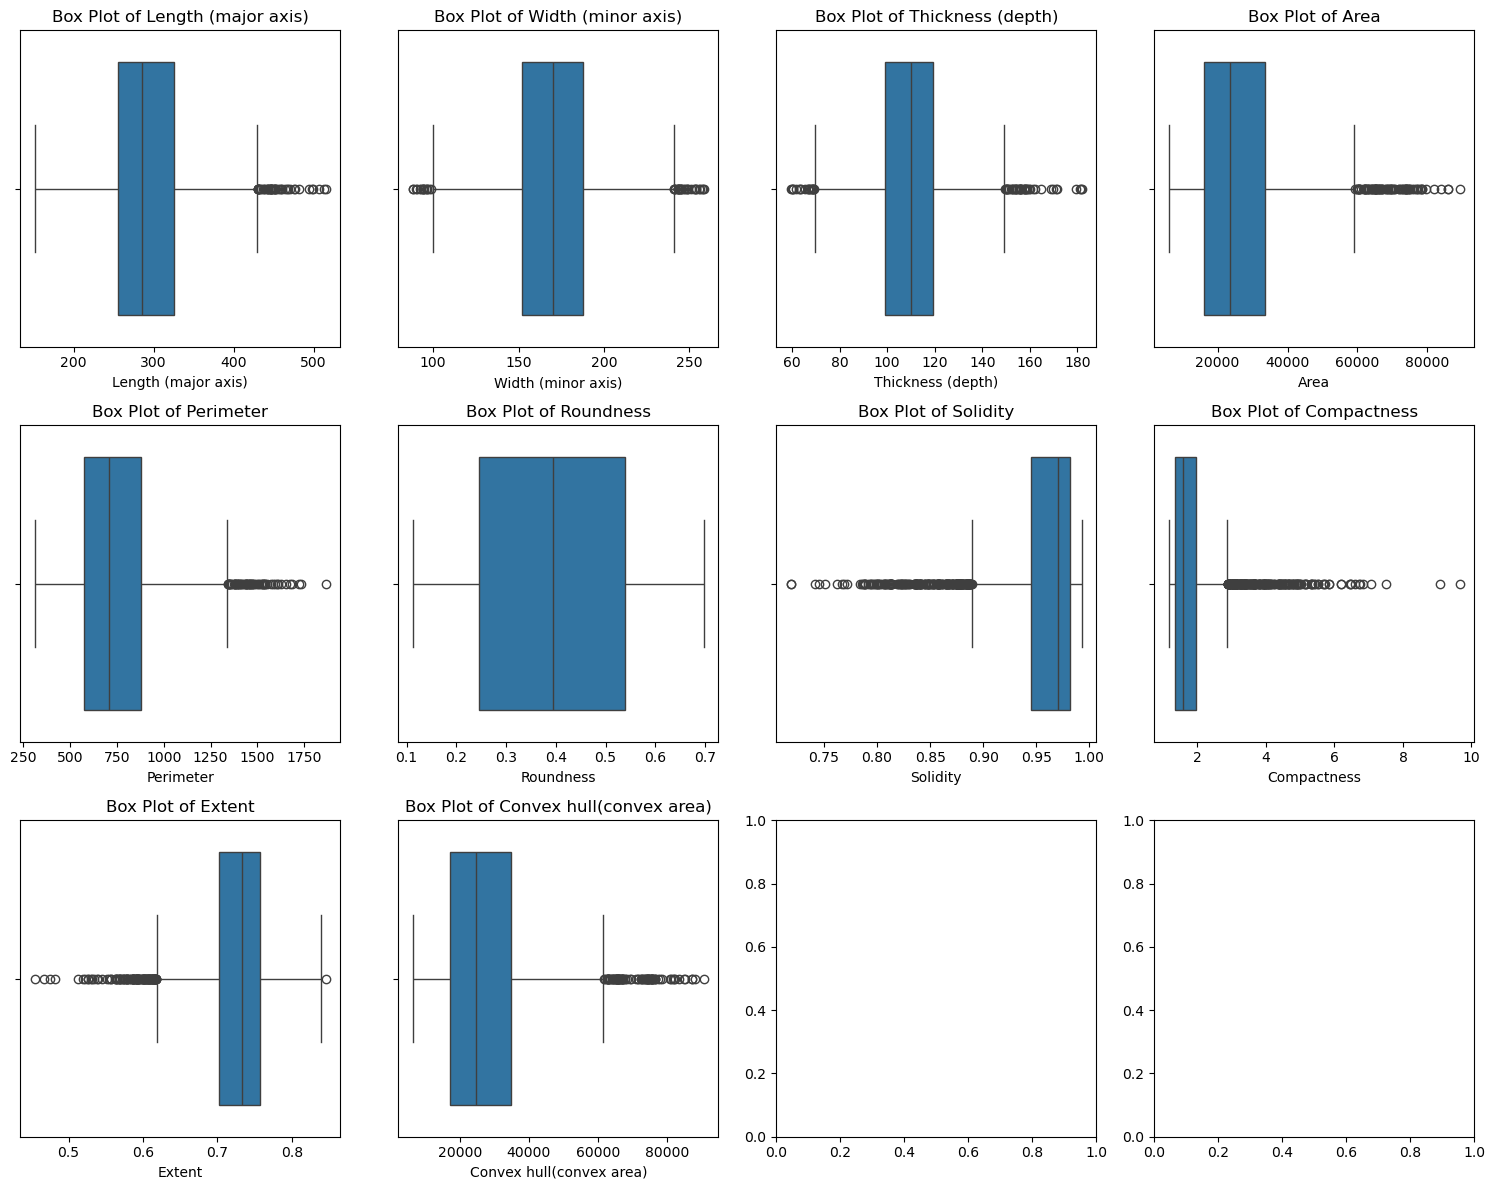

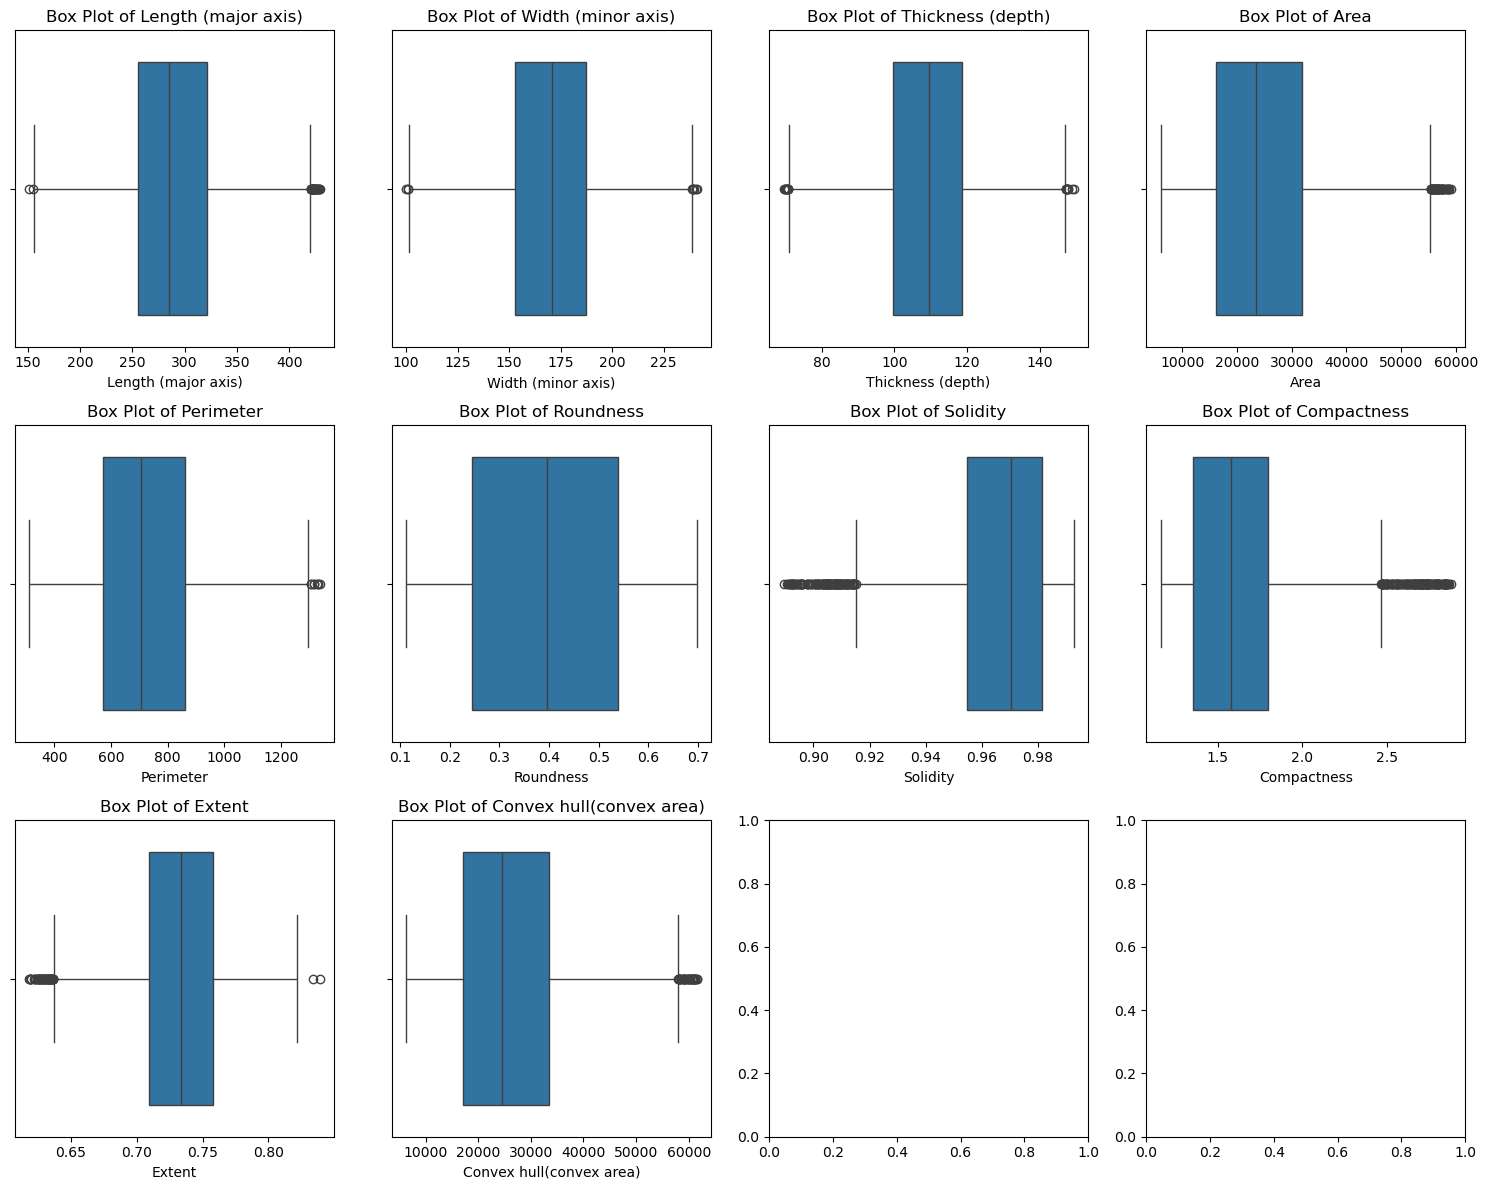

In [8]:
#Handle Outliers 
def handle_outliers(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    for column in numeric_data.columns:
        skewness = numeric_data[column].skew()
        Q1 = numeric_data[column].quantile(0.25)
        Q3 = numeric_data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (numeric_data[column] < lower_bound) | (numeric_data[column] > upper_bound)
        
        if abs(skewness) > 0.5:
            median = numeric_data[column].median()
            numeric_data.loc[outliers, column] = median
        else:
            mean = data[column].mean()
            numeric_data.loc[outliers, column] = mean

    numeric_data['Type'] = data['Type']
    return numeric_data

def visualise_outliers(data):
    features = ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)', 
                'Area', 'Perimeter', 'Roundness', 'Solidity', 
                'Compactness', 'Extent', 'Convex hull(convex area)']
    num_features = len(features)
    cols = 4  
    rows = (num_features + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
    axes = axes.flatten() 
    
    for i, feature in enumerate(features):
        sns.boxplot(ax=axes[i], x=data[feature])
        axes[i].set_title(f'Box Plot of {feature}')
        axes[i].set_xlabel(feature)

    plt.tight_layout()
    plt.show()
visualise_outliers(df)
df = handle_outliers(df.copy())
visualise_outliers(df)


In [9]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Type' column
df['Type'] = label_encoder.fit_transform(df['Type'])
labels = df['Type']
features = df.drop('Type', axis=1)

# Split the data into training + validation (70%) and testing (30%)
train_val_features, test_features, train_val_labels, test_labels = train_test_split(features, labels, test_size=0.30, random_state=42)

# Now, split the training + validation set into training (57%) and validation (13%)
train_features, val_features, train_labels, val_labels = train_test_split(train_val_features, train_val_labels, test_size=0.1875, random_state=42)


In [10]:
# First, split the data into training + validation (70%) and testing (30%)
train_val, test = train_test_split(df, test_size=0.30, random_state=42)

# Now, split the training + validation set into training (57%) and validation (13%)
# 0.1875 * 0.7 ≈ 0.13 of the original data for validation
train, val = train_test_split(train_val, test_size=0.1875, random_state=42)


In [11]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
train_scaled = scaler.fit_transform(train_features)

# Use the same scaler to transform the validation and test data
val_scaled = scaler.transform(val_features)
test_scaled = scaler.transform(test_features)

# Convert scaled data back to DataFrames
train_scaled_df = pd.DataFrame(train_scaled, columns=train_features.columns)
val_scaled_df = pd.DataFrame(val_scaled, columns=val_features.columns)
test_scaled_df = pd.DataFrame(test_scaled, columns=test_features.columns)
print("Training set (scaled):")
print(train_scaled_df.head())
print("\nValidation set (scaled):")
print(val_scaled_df.head())
print("\nTesting set (scaled):")
print(test_scaled_df.head())
# If train_scaled_features is a NumPy array
input_shape = train_scaled_df.shape

# If train_scaled_features is a Pandas DataFrame
input_shape = train_scaled_df.shape[1]
print(f"The input shape is: {input_shape}")

Training set (scaled):
   Length (major axis)  Width (minor axis)  Thickness (depth)      Area  \
0             0.764698            0.010776           0.275546  1.603283   
1            -0.306294           -0.514862          -1.845453 -1.362660   
2             0.358099            0.553293          -1.200870 -1.069659   
3             1.812512           -0.181566           0.042061  2.142795   
4            -0.034222           -0.553287           0.131541  0.875371   

   Perimeter  Roundness  Solidity  Compactness    Extent  \
0   0.709592   0.714199  0.860671    -0.656152  1.191643   
1  -1.362739  -1.496013 -0.796317     0.088394 -0.441246   
2  -1.241544  -1.437349  0.661994    -0.674218  0.687558   
3  -0.097150   0.183536 -3.100254    -0.179469 -0.209656   
4   0.202659   0.919733  1.028281    -0.798151  1.154895   

   Convex hull(convex area)  
0                  1.521402  
1                 -1.370864  
2                 -1.109935  
3                  2.479791  
4              

In [12]:
# Print the shapes of the training data and labels
print(f"Shape of train_scaled_df: {train_scaled_df.shape}")
print(f"Shape of train_labels: {train_labels.shape}")

# Print the shapes of the validation data and labels
print(f"Shape of val_scaled_df: {val_scaled_df.shape}")
print(f"Shape of val_labels: {val_labels.shape}")


Shape of train_scaled_df: (1594, 10)
Shape of train_labels: (1594,)
Shape of val_scaled_df: (368, 10)
Shape of val_labels: (368,)


In [13]:
# Define the learning rate schedule function
from tensorflow.keras import Input
def lr_schedule(epoch):
    initial_lr = 0.10
    decay_rate = 0.1
    decay_steps = 50
    lr = initial_lr * decay_rate ** (epoch // decay_steps)
    print('Learning rate: ' + str(lr))
    return lr

# Create the model
model = Sequential([
    Input(shape=(10,)),  # Specify the input shape using Input layer
    Dense(50, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(80, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(50, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')  # Final output layer with 3 classes
])
# Initialize the SGD optimizer with the learning rate parameter
optimizer = SGD(learning_rate=0.1)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with the learning rate scheduler callback
print("Training the model...")
history = model.fit(train_scaled_df, train_labels, 
                    batch_size=50, 
                    epochs=200, 
                    verbose=1, 
                    validation_data=(val_scaled_df, val_labels))

# Evaluate the model
print("Evaluating the model...")
loss, accuracy = model.evaluate(test_scaled_df, test_labels)
print('Loss:', loss)
print('Accuracy:', accuracy)

# print('Loss:', loss)
# print('Accuracy:', accuracy)


# Make predictions
print("Making predictions...")
predictions = model.predict(test_scaled_df)
y_pred = np.argmax(predictions, axis=1)
confusion = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:")
print(confusion)

Training the model...
Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4271 - loss: 3.1642 - val_accuracy: 0.4891 - val_loss: 2.6031
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.5031 - loss: 2.5513 - val_accuracy: 0.4810 - val_loss: 2.4364
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.5619 - loss: 2.3033 - val_accuracy: 0.4484 - val_loss: 2.2857
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.5902 - loss: 2.0712 - val_accuracy: 0.4728 - val_loss: 2.1209
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.6013 - loss: 1.9461 - val_accuracy: 0.4891 - val_loss: 2.0116
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.6015 - loss: 1.8040 - val_accuracy: 0.4674 - val_loss: 1.8986
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.5982 - loss: 1.6949 - val_accuracy: 0.4946 - val_loss: 1.7908
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.6254 - los

Epoch [5/1000], Loss: 0.8912, Val Loss: 1.0550, Val Accuracy: 55.16%
Epoch [10/1000], Loss: 0.8332, Val Loss: 0.9523, Val Accuracy: 60.33%
Epoch [15/1000], Loss: 0.8235, Val Loss: 0.9447, Val Accuracy: 59.24%
Epoch [20/1000], Loss: 0.8068, Val Loss: 0.9061, Val Accuracy: 63.59%
Epoch [25/1000], Loss: 0.8040, Val Loss: 0.8851, Val Accuracy: 66.30%
Epoch [30/1000], Loss: 0.8000, Val Loss: 0.8627, Val Accuracy: 66.85%
Epoch [35/1000], Loss: 0.7886, Val Loss: 0.8470, Val Accuracy: 69.57%
Epoch [40/1000], Loss: 0.7969, Val Loss: 0.8381, Val Accuracy: 71.47%
Epoch [45/1000], Loss: 0.7915, Val Loss: 0.8355, Val Accuracy: 71.47%
Epoch [50/1000], Loss: 0.7926, Val Loss: 0.8338, Val Accuracy: 70.92%
Epoch [55/1000], Loss: 0.7982, Val Loss: 0.8330, Val Accuracy: 72.28%
Epoch [60/1000], Loss: 0.7867, Val Loss: 0.8317, Val Accuracy: 72.55%
Epoch [65/1000], Loss: 0.7943, Val Loss: 0.8314, Val Accuracy: 72.55%
Epoch [70/1000], Loss: 0.7941, Val Loss: 0.8307, Val Accuracy: 72.28%
Epoch [75/1000], Loss

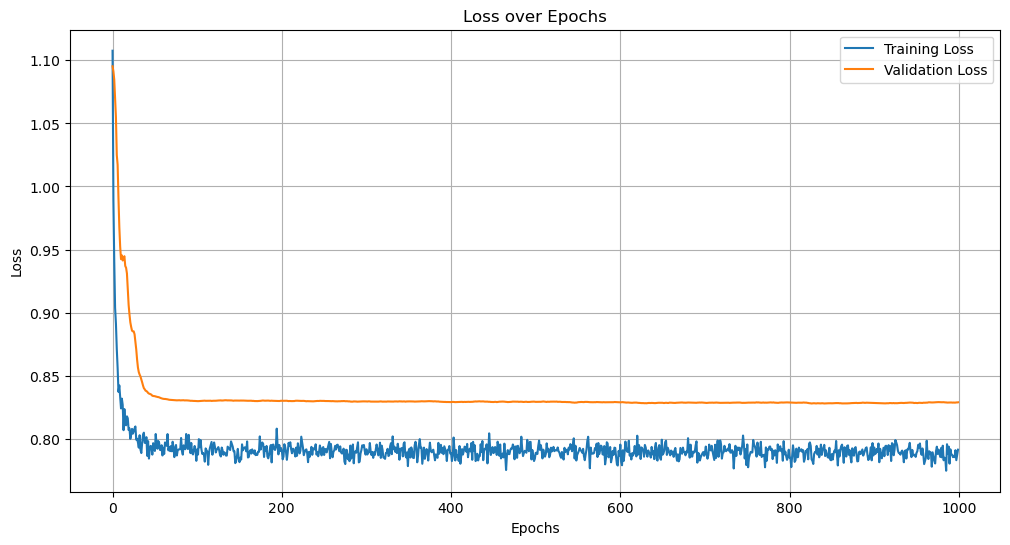

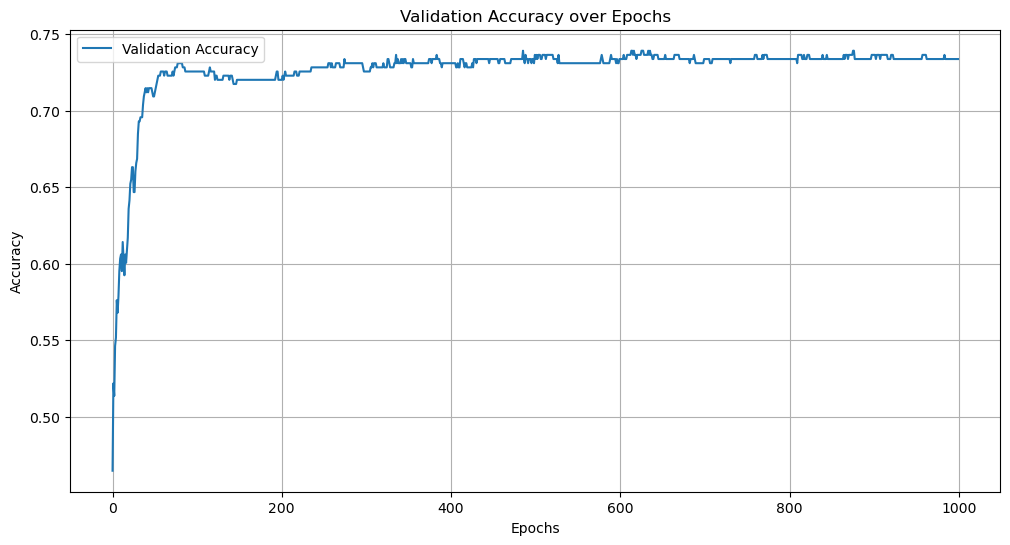

Confusion Matrix:
[[222  35  30]
 [ 16 182  80]
 [ 17  57 202]]


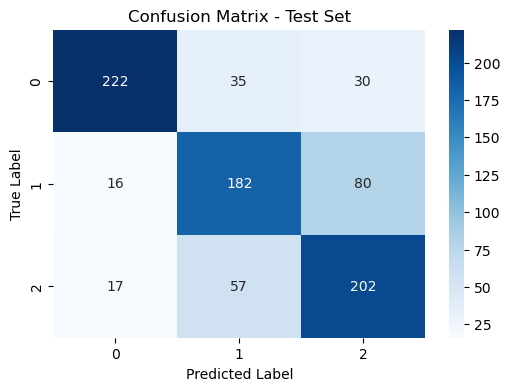

Test Accuracy: 72.06%


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_scaled_df, train_labels, val_scaled_df, val_labels are loaded
# Convert DataFrames to tensors
train_inputs = torch.FloatTensor(train_scaled_df.values)
train_targets = torch.LongTensor(train_labels.values)
val_inputs = torch.FloatTensor(val_scaled_df.values)
val_targets = torch.LongTensor(val_labels.values)

# Create TensorDatasets
train_dataset = TensorDataset(train_inputs, train_targets)
val_dataset = TensorDataset(val_inputs, val_targets)
print(train_dataset)
print(val_dataset)

# Define the model
model1 = nn.Sequential(
    nn.Linear(train_inputs.shape[1], 50),  # Input layer matching the number of features
    nn.ReLU(),
    nn.BatchNorm1d(50),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(50, 80),  # Second layer with 80 neurons
    nn.ReLU(),
    nn.BatchNorm1d(80),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(80, 100),  # Third layer with 100 neurons
    nn.ReLU(),
    nn.BatchNorm1d(100),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(100, 50),  # Fourth layer with 50 neurons
    nn.ReLU(),
    nn.BatchNorm1d(50),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(50, 3),  # Final output layer with 3 classes
    nn.Softmax(dim=1)   # 3 output classes
)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Rprop(model1.parameters(), lr=0.01)

num_epochs = 1000
losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model1.train()  # Set the model to training mode
    
    # Forward pass for the full batch
    outputs = model1(train_inputs)
    loss = criterion(outputs, train_targets)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())  # Store the training loss

    # Validation loop for the full batch
    model1.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model1(val_inputs)
        val_loss = criterion(val_outputs, val_targets).item()
        val_losses.append(val_loss)  # Store the validation loss
        
        _, predicted = torch.max(val_outputs, 1)
        correct = (predicted == val_targets).sum().item()
        val_accuracy = correct / val_targets.size(0)
        val_accuracies.append(val_accuracy)  # Store the validation accuracy

    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Optionally plot the validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
# Test set evaluation
test_inputs = torch.tensor(test_scaled_df.values, dtype=torch.float32)
test_targets = torch.tensor(test_labels.values, dtype=torch.long)

# Set the model to evaluation mode
model1.eval()

# Make predictions
with torch.no_grad():
    test_outputs = model1(test_inputs)
    _, y_pred = torch.max(test_outputs, 1)  # Get the predicted class

# Convert predictions and true labels to numpy arrays
y_pred = y_pred.numpy()
test_targets = test_targets.numpy()

# Compute confusion matrix
confusion = confusion_matrix(test_targets, y_pred)
print("Confusion Matrix:")
print(confusion)

# Optionally visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Calculate accuracy
test_accuracy = accuracy_score(test_targets, y_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch [5/1000], Loss: 0.9165, Val Loss: 1.0692, Val Accuracy: 51.90%
Epoch [10/1000], Loss: 0.8550, Val Loss: 0.9986, Val Accuracy: 51.63%
Epoch [15/1000], Loss: 0.8322, Val Loss: 0.9513, Val Accuracy: 58.42%
Epoch [20/1000], Loss: 0.8077, Val Loss: 0.9301, Val Accuracy: 59.24%
Epoch [25/1000], Loss: 0.7974, Val Loss: 0.8803, Val Accuracy: 64.40%
Epoch [30/1000], Loss: 0.7809, Val Loss: 0.8674, Val Accuracy: 67.66%
Epoch [35/1000], Loss: 0.7757, Val Loss: 0.8525, Val Accuracy: 69.02%
Epoch [40/1000], Loss: 0.7775, Val Loss: 0.8441, Val Accuracy: 69.57%
Epoch [45/1000], Loss: 0.7611, Val Loss: 0.8318, Val Accuracy: 71.74%
Epoch [50/1000], Loss: 0.7641, Val Loss: 0.8334, Val Accuracy: 71.47%
Epoch [55/1000], Loss: 0.7652, Val Loss: 0.8150, Val Accuracy: 73.91%
Epoch [60/1000], Loss: 0.7621, Val Loss: 0.8354, Val Accuracy: 70.11%
Epoch [65/1000], Loss: 0.7519, Val Loss: 0.8248, Val Accuracy: 72.01%
Epoch [70/1000], Loss: 0.7379, Val Loss: 0.8091, Val Accuracy: 73.37%
Epoch [75/1000], Loss

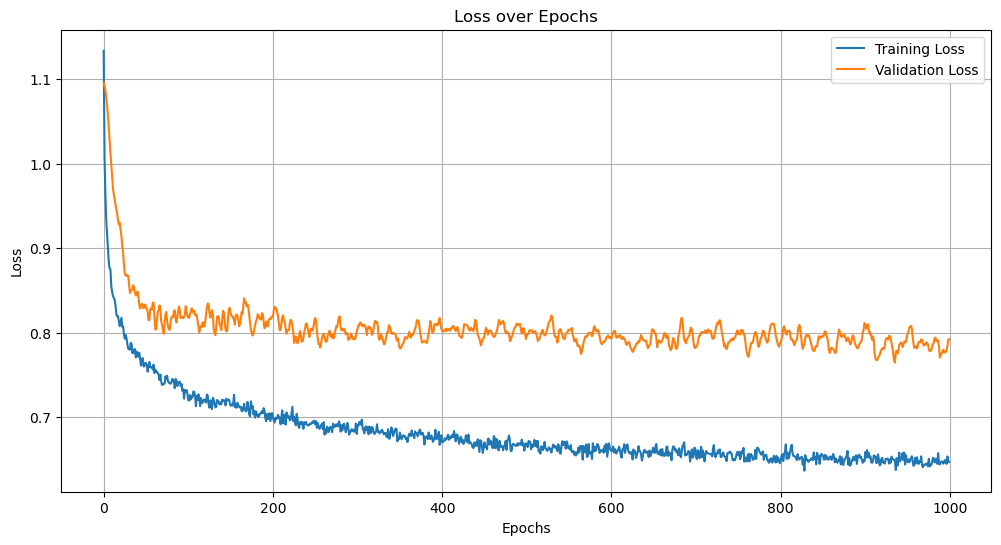

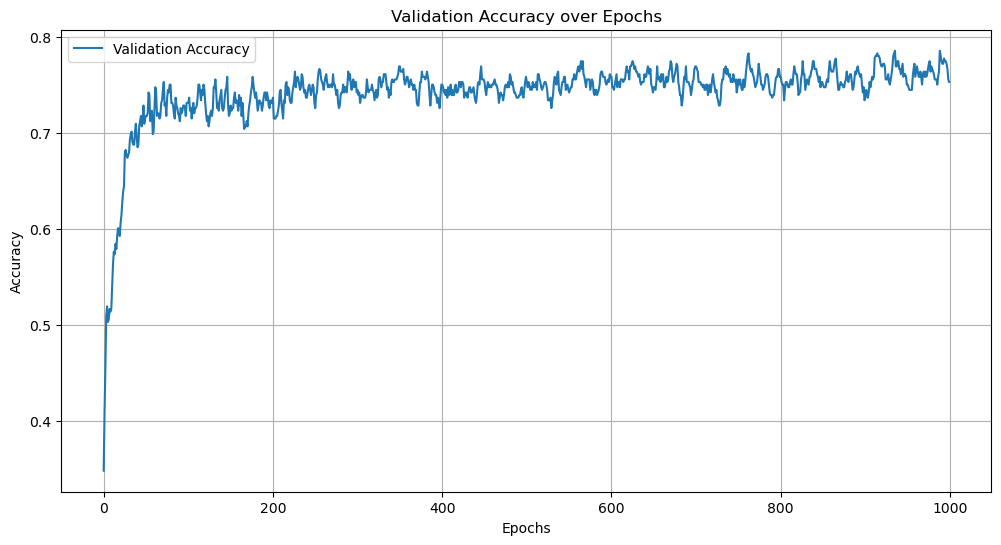

Confusion Matrix:
[[244  23  20]
 [  9 209  60]
 [ 22  56 198]]


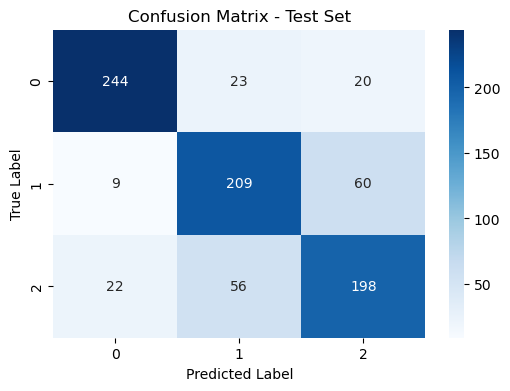

Test Accuracy: 77.41%


In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_scaled_df, train_labels, val_scaled_df, val_labels are loaded
# Convert DataFrames to tensors
train_inputs = torch.FloatTensor(train_scaled_df.values)
train_targets = torch.LongTensor(train_labels.values)
val_inputs = torch.FloatTensor(val_scaled_df.values)
val_targets = torch.LongTensor(val_labels.values)

# Create TensorDatasets
train_dataset = TensorDataset(train_inputs, train_targets)
val_dataset = TensorDataset(val_inputs, val_targets)
print(train_dataset)
print(val_dataset)

# Define the model
model1 = nn.Sequential(
    nn.Linear(train_inputs.shape[1], 50),  # Input layer matching the number of features
    nn.ReLU(),
    nn.BatchNorm1d(50),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(50, 80),  # Second layer with 80 neurons
    nn.ReLU(),
    nn.BatchNorm1d(80),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(80, 100),  # Third layer with 100 neurons
    nn.ReLU(),
    nn.BatchNorm1d(100),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(100, 50),  # Fourth layer with 50 neurons
    nn.ReLU(),
    nn.BatchNorm1d(50),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(50, 3),  # Final output layer with 3 classes
    nn.Softmax(dim=1)   # 3 output classes
)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.01)

num_epochs = 1000
losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model1.train()  # Set the model to training mode
    
    # Forward pass for the full batch
    outputs = model1(train_inputs)
    loss = criterion(outputs, train_targets)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())  # Store the training loss

    # Validation loop for the full batch
    model1.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model1(val_inputs)
        val_loss = criterion(val_outputs, val_targets).item()
        val_losses.append(val_loss)  # Store the validation loss
        
        _, predicted = torch.max(val_outputs, 1)
        correct = (predicted == val_targets).sum().item()
        val_accuracy = correct / val_targets.size(0)
        val_accuracies.append(val_accuracy)  # Store the validation accuracy

    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Optionally plot the validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
# Test set evaluation
test_inputs = torch.tensor(test_scaled_df.values, dtype=torch.float32)
test_targets = torch.tensor(test_labels.values, dtype=torch.long)

# Set the model to evaluation mode
model1.eval()

# Make predictions
with torch.no_grad():
    test_outputs = model1(test_inputs)
    _, y_pred = torch.max(test_outputs, 1)  # Get the predicted class

# Convert predictions and true labels to numpy arrays
y_pred = y_pred.numpy()
test_targets = test_targets.numpy()

# Compute confusion matrix
confusion = confusion_matrix(test_targets, y_pred)
print("Confusion Matrix:")
print(confusion)

# Optionally visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Calculate accuracy
test_accuracy = accuracy_score(test_targets, y_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch [100/1000], Loss: 0.7349, Val Loss: 0.7808, Val Accuracy: 76.90%
Epoch [200/1000], Loss: 0.7109, Val Loss: 0.7923, Val Accuracy: 75.00%
Epoch [300/1000], Loss: 0.6944, Val Loss: 0.7782, Val Accuracy: 77.17%
Epoch [400/1000], Loss: 0.6815, Val Loss: 0.8038, Val Accuracy: 74.18%
Epoch [500/1000], Loss: 0.6711, Val Loss: 0.7876, Val Accuracy: 76.63%
Epoch [600/1000], Loss: 0.6715, Val Loss: 0.7947, Val Accuracy: 75.82%
Epoch [700/1000], Loss: 0.6652, Val Loss: 0.7951, Val Accuracy: 75.27%
Epoch [800/1000], Loss: 0.6519, Val Loss: 0.7841, Val Accuracy: 76.09%
Epoch [900/1000], Loss: 0.6526, Val Loss: 0.7886, Val Accuracy: 76.09%
Epoch [1000/1000], Loss: 0.6458, Val Loss: 0.7877, Val Accuracy: 76.09%


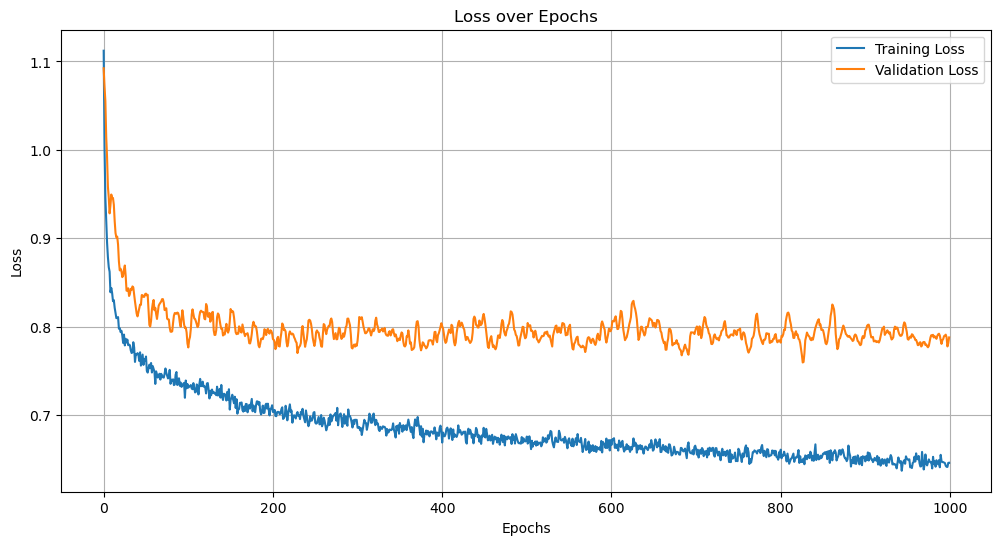

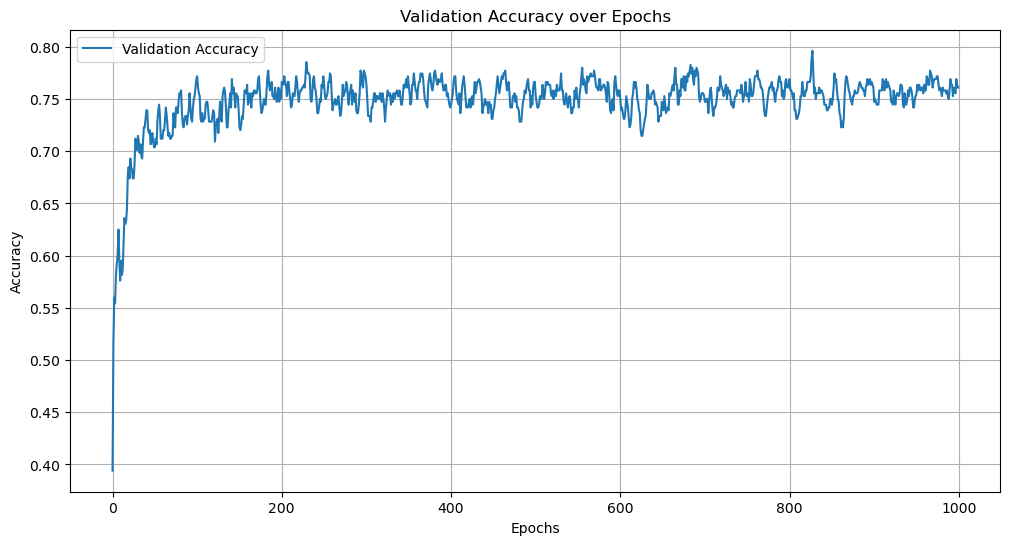

Confusion Matrix:
[[242  18  27]
 [  9 209  60]
 [ 17  52 207]]


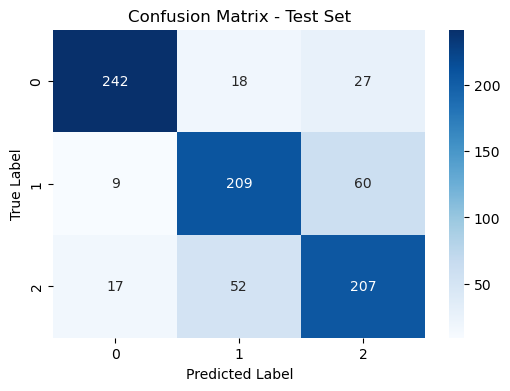

Test Accuracy: 78.24%


In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_scaled_df, train_labels, val_scaled_df, val_labels are loaded
# Convert DataFrames to tensors
train_inputs = torch.FloatTensor(train_scaled_df.values)
train_targets = torch.LongTensor(train_labels.values)
val_inputs = torch.FloatTensor(val_scaled_df.values)
val_targets = torch.LongTensor(val_labels.values)

# Create TensorDatasets
train_dataset = TensorDataset(train_inputs, train_targets)
val_dataset = TensorDataset(val_inputs, val_targets)
print(train_dataset)
print(val_dataset)

# Define the model
model1 = nn.Sequential(
    nn.Linear(train_inputs.shape[1], 50),  # Input layer matching the number of features
    nn.ReLU(),
    nn.BatchNorm1d(50),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(50, 80),  # Second layer with 80 neurons
    nn.ReLU(),
    nn.BatchNorm1d(80),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(80, 100),  # Third layer with 100 neurons
    nn.ReLU(),
    nn.BatchNorm1d(100),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(100, 50),  # Fourth layer with 50 neurons
    nn.ReLU(),
    nn.BatchNorm1d(50),  # Batch Normalization
    nn.Dropout(0.1),  # Dropout
    nn.Linear(50, 3),  # Final output layer with 3 classes
    nn.Softmax(dim=1)   # 3 output classes
)

# Loss function and optimizer
num_epochs = 1000
learning_rates = [0.01, 0.01]
losses = []
val_losses = []
val_accuracies = []

optimizers = [
    optim.Rprop(model1.parameters(), lr=learning_rates[0]),
    optim.Adam(model1.parameters(), lr=learning_rates[1])
]

criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

# Training Loop
for epoch in range(num_epochs):
    model1.train()
    outputs = model1(train_inputs)
    loss = criterion(outputs, train_targets)

    # Zero gradients for both optimizers
    for optimizer in optimizers:
        optimizer.zero_grad()

    loss.backward()

    # Accumulate gradients and update using both optimizers
    total_gradients = [param.grad.clone() for param in model1.parameters()]
    for optimizer in optimizers:
        for i, param in enumerate(model1.parameters()):
            param.grad = total_gradients[i]
        optimizer.step()

    history['loss'].append(loss.item())

    # Validation
    model1.eval()
    with torch.no_grad():
        val_outputs = model1(val_inputs)
        val_loss = criterion(val_outputs, val_targets).item()
        history['val_loss'].append(val_loss)

        _, predicted = torch.max(val_outputs, 1)
        correct = (predicted == val_targets).sum().item()
        val_accuracy = correct / val_targets.size(0)
        history['val_accuracy'].append(val_accuracy)

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Optionally plot the validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Test set evaluation
test_inputs = torch.tensor(test_scaled_df.values, dtype=torch.float32)
test_targets = torch.tensor(test_labels.values, dtype=torch.long)

# Set the model to evaluation mode
model1.eval()

# Make predictions
with torch.no_grad():
    test_outputs = model1(test_inputs)
    _, y_pred = torch.max(test_outputs, 1)  # Get the predicted class

# Convert predictions and true labels to numpy arrays
y_pred = y_pred.numpy()
test_targets = test_targets.numpy()

# Compute confusion matrix
confusion = confusion_matrix(test_targets, y_pred)
print("Confusion Matrix:")
print(confusion)

# Optionally visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Calculate accuracy
test_accuracy = accuracy_score(test_targets, y_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Training with Activation Function: relu, Architecture: {'units': [50, 80, 150, 180, 90], 'dropout': [0.2, 0.3, 0.1, 0.1, 0.2]}
Fold 1/5
Epoch [100/1000], Loss: 0.8449, Val Loss: 0.8564, Val Accuracy: 68.03%
Epoch [200/1000], Loss: 0.8407, Val Loss: 0.8556, Val Accuracy: 68.03%
Epoch [300/1000], Loss: 0.8284, Val Loss: 0.8555, Val Accuracy: 68.03%
Epoch [400/1000], Loss: 0.8426, Val Loss: 0.8548, Val Accuracy: 68.34%
Epoch [500/1000], Loss: 0.8380, Val Loss: 0.8545, Val Accuracy: 68.34%
Epoch [600/1000], Loss: 0.8347, Val Loss: 0.8548, Val Accuracy: 68.03%
Epoch [700/1000], Loss: 0.8354, Val Loss: 0.8542, Val Accuracy: 68.34%
Epoch [800/1000], Loss: 0.8348, Val Loss: 0.8538, Val Accuracy: 68.34%
Epoch [900/1000], Loss: 0.8222, Val Loss: 0.8540, Val Accuracy: 68.34%
Epoch [1000/1000], Loss: 0.8297, Val Loss: 0.8542, Val Accuracy: 68.34%
Fold 1 Accuracy: 0.6834
Fold 2/5
Epoch [100/1000], Loss: 0.8229, Val Loss: 0.8557, Val Accuracy: 68.34%
Epoch [200/1000], Loss: 0.8250, Val Loss: 0.8555,

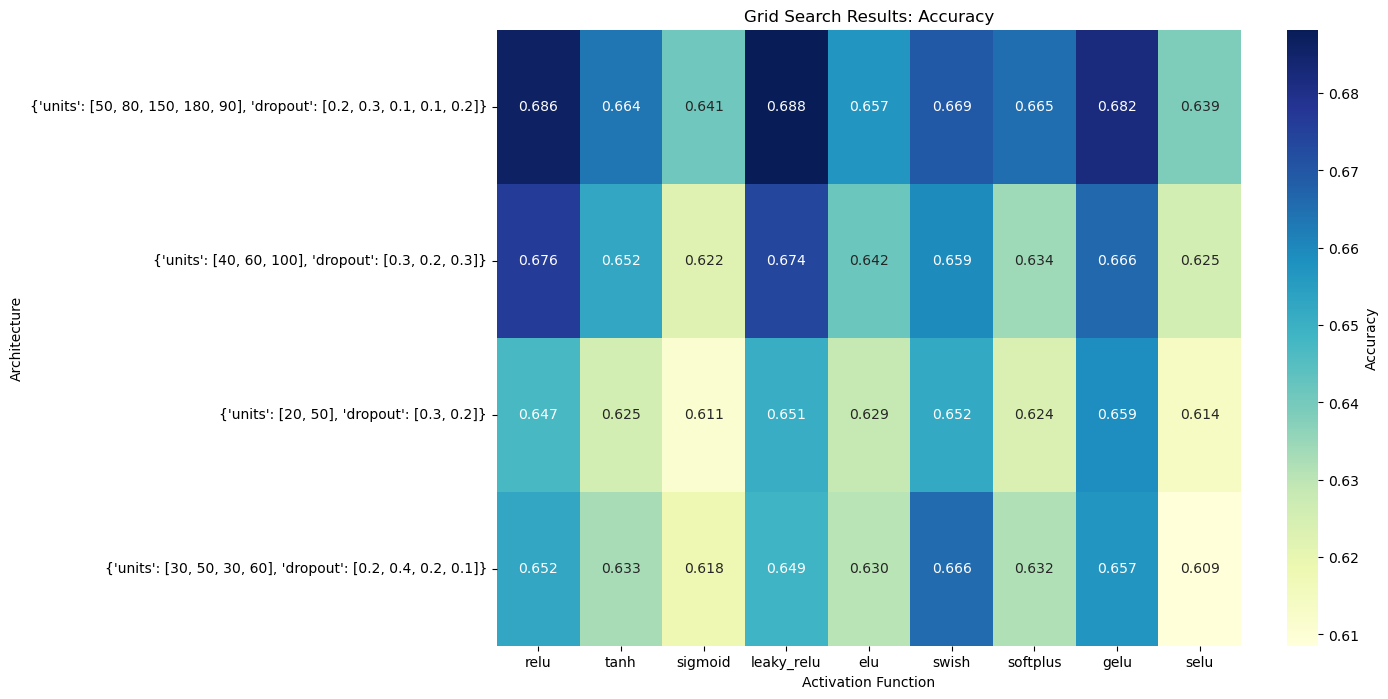

Best Hyperparameters - Architecture: {'units': [50, 80, 150, 180, 90], 'dropout': [0.2, 0.3, 0.1, 0.1, 0.2]}, Activation: leaky_relu
Best Accuracy: 0.6882


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid, KFold
import torch
import torch.nn as nn
import torch.optim as optim

# Define parameter grid with different architectures and activations
param_grid = {
    'architecture': [
        {'units': [50, 80, 150, 180, 90], 'dropout': [0.2, 0.3, 0.1, 0.1, 0.2]},  # Architecture 1
        {'units': [40, 60, 100], 'dropout': [0.3, 0.2, 0.3]},  # Architecture 2
        {'units': [20, 50], 'dropout': [0.3, 0.2]}, 
        {'units': [30, 50, 30, 60], 'dropout': [0.2, 0.4, 0.2, 0.1]},  # Architecture 3
    ],
    'activation': ['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu', 'swish', 'softplus', 'gelu', 'selu'],
}

# Function to create the model based on architecture and activation
def create_pytorch_model(params):
    layers = []
    
    # Input layer
    layers.append(nn.Linear(train_inputs.shape[1], params['architecture']['units'][0]))
    
    # Hidden layers
    for i, units in enumerate(params['architecture']['units']):
        if i > 0:
            layers.append(nn.Linear(params['architecture']['units'][i-1], units))
        
        # Activation function
        activation = params['activation']
        if activation == 'relu':
            layers.append(nn.ReLU())
        elif activation == 'tanh':
            layers.append(nn.Tanh())
        elif activation == 'sigmoid':
            layers.append(nn.Sigmoid())
        elif activation == 'leaky_relu':
            layers.append(nn.LeakyReLU())
        elif activation == 'elu':
            layers.append(nn.ELU())
        elif activation == 'swish':
            layers.append(nn.SiLU())
        elif activation == 'softplus':
            layers.append(nn.Softplus())
        elif activation == 'gelu':
            layers.append(nn.GELU())
        elif activation == 'selu':
            layers.append(nn.SELU())
        
        # Batch Normalization and Dropout
        layers.append(nn.BatchNorm1d(units))
        layers.append(nn.Dropout(params['architecture']['dropout'][i]))
    
    # Output layer
    layers.append(nn.Linear(params['architecture']['units'][-1], 3))
    layers.append(nn.Softmax(dim=1))  # Softmax for output
    
    model = nn.Sequential(*layers)
    return model

# Function to train and evaluate the model
def train_and_evaluate(model, train_inputs, train_targets, val_inputs, val_targets, learning_rate, max_epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Rprop(model.parameters(), lr=learning_rate)
    
    history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

    for epoch in range(max_epochs):
        model.train()
        outputs = model(train_inputs)
        loss = criterion(outputs, train_targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        history['loss'].append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_targets).item()
            history['val_loss'].append(val_loss)
        
            _, predicted = torch.max(val_outputs, 1)
            correct = (predicted == val_targets).sum().item()
            val_accuracy = correct / val_targets.size(0)
            history['val_accuracy'].append(val_accuracy)

        if (epoch + 1) % 50 == 0:
            print(f"Epoch [{epoch+1}/{max_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")

    # Final accuracy
    outputs = model(val_inputs)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == val_targets).sum().item() / val_targets.size(0)
    
    return history, accuracy

# Function to perform K-fold cross-validation
def k_fold_cross_validation(model_class, train_inputs, train_targets, params, k=5, learning_rate=0.01, max_epochs=1000):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    all_accuracy = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(train_inputs)):
        print(f"Fold {fold + 1}/{k}")
        
        # Create training and validation datasets
        train_x, val_x = train_inputs[train_idx], train_inputs[val_idx]
        train_y, val_y = train_targets[train_idx], train_targets[val_idx]

        # Initialize the model
        model = model_class(params)
        
        # Train and evaluate the model
        history, accuracy = train_and_evaluate(
            model,
            train_x,
            train_y,
            val_x,
            val_y,
            learning_rate=learning_rate,
            max_epochs=max_epochs
        )
        
        all_accuracy.append(accuracy)
        print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")
    
    # Average accuracy across all folds
    mean_accuracy = np.mean(all_accuracy)
    std_accuracy = np.std(all_accuracy)
    print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    return mean_accuracy

# Create the grid of hyperparameters
grid = ParameterGrid(param_grid)

# Initialize results matrix
results = np.zeros((len(param_grid['activation']), len(param_grid['architecture'])))

# Perform grid search
# Initialize results matrix
num_activations = len(param_grid['activation'])
num_architectures = len(param_grid['architecture'])
results = np.zeros((num_architectures, num_activations))  # rows for architectures, columns for activations

# Perform grid search
for i, params in enumerate(grid):
    print(f"Training with Activation Function: {params['activation']}, Architecture: {params['architecture']}")
    
    # Perform K-fold cross-validation for each set of hyperparameters
    mean_accuracy = k_fold_cross_validation(create_pytorch_model, train_inputs, train_targets, params, k=5, learning_rate=0.01, max_epochs=1000)
    
    # Find the index for the current architecture and activation
    arch_index = param_grid['architecture'].index(params['architecture'])
    act_index = param_grid['activation'].index(params['activation'])
    
    # Store the results
    results[arch_index, act_index] = mean_accuracy

# Visualization of results using a heatmap for all architectures and activations
plt.figure(figsize=(12, 8))
sns.heatmap(results, annot=True, fmt='.3f', 
            xticklabels=param_grid['activation'], 
            yticklabels=[str(arch) for arch in param_grid['architecture']], 
            cmap='YlGnBu', cbar_kws={'label': 'Accuracy'})
plt.xlabel('Activation Function')
plt.ylabel('Architecture')
plt.title('Grid Search Results: Accuracy')
plt.show()

# Find the best hyperparameters
best_params_idx = np.unravel_index(np.argmax(results), results.shape)
best_arch = param_grid['architecture'][best_params_idx[0]]
best_act = param_grid['activation'][best_params_idx[1]]
best_accuracy = results[best_params_idx]

print(f"Best Hyperparameters - Architecture: {best_arch}, Activation: {best_act}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Epoch [100/1000], Loss: 0.8485, Val Loss: 0.8605, Val Accuracy: 67.93%
Epoch [200/1000], Loss: 0.8406, Val Loss: 0.8612, Val Accuracy: 68.21%
Epoch [300/1000], Loss: 0.8314, Val Loss: 0.8617, Val Accuracy: 67.93%
Epoch [400/1000], Loss: 0.8407, Val Loss: 0.8609, Val Accuracy: 67.93%
Epoch [500/1000], Loss: 0.8434, Val Loss: 0.8617, Val Accuracy: 67.93%
Epoch [600/1000], Loss: 0.8421, Val Loss: 0.8626, Val Accuracy: 67.12%
Epoch [700/1000], Loss: 0.8362, Val Loss: 0.8629, Val Accuracy: 67.12%
Epoch [800/1000], Loss: 0.8475, Val Loss: 0.8627, Val Accuracy: 66.58%
Epoch [900/1000], Loss: 0.8377, Val Loss: 0.8634, Val Accuracy: 66.85%
Epoch [1000/1000], Loss: 0.8417, Val Loss: 0.8637, Val Accuracy: 66.85%
Confusion Matrix for the Best Model:
[[211  39  37]
 [ 14 168  96]
 [ 16  65 195]]


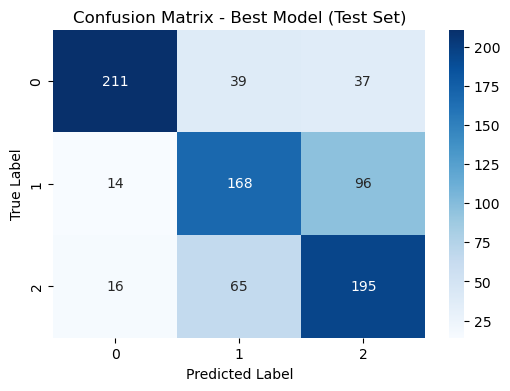

Test Accuracy for the Best Model: 68.25%


In [18]:
# Assuming `best_arch` and `best_act` have been identified from your grid search.

# Create the best model with the selected architecture and activation
best_params = {'architecture': best_arch, 'activation': best_act}
best_model = create_pytorch_model(best_params)

# Train the best model on the full training dataset (train_inputs, train_targets)
train_and_evaluate(best_model, train_inputs, train_targets, val_inputs, val_targets, learning_rate=0.01, max_epochs=1000)

# Evaluate on the test set
best_model.eval()  # Set the model to evaluation mode

# Convert test data to tensor if not already done
test_inputs = torch.tensor(test_scaled_df.values, dtype=torch.float32)
test_targets = torch.tensor(test_labels.values, dtype=torch.long)

with torch.no_grad():
    test_outputs = best_model(test_inputs)
    _, y_pred = torch.max(test_outputs, 1)  # Get the predicted class

# Convert predictions and true labels to numpy arrays
y_pred = y_pred.numpy()
test_targets = test_targets.numpy()

# Compute the confusion matrix
confusion = confusion_matrix(test_targets, y_pred)
print("Confusion Matrix for the Best Model:")
print(confusion)

# Optionally visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Best Model (Test Set)')
plt.show()

# Calculate test accuracy
test_accuracy = accuracy_score(test_targets, y_pred)
print(f'Test Accuracy for the Best Model: {test_accuracy * 100:.2f}%')

Training with Activation Function: relu, Architecture: {'units': [50, 80, 150, 180, 90], 'dropout': [0.2, 0.3, 0.1, 0.1, 0.2]}
Fold 1/5
Epoch [100/1000], Loss: 0.8276, Val Loss: 0.8684, Val Accuracy: 67.08%
Epoch [200/1000], Loss: 0.7887, Val Loss: 0.8557, Val Accuracy: 69.28%
Epoch [300/1000], Loss: 0.7655, Val Loss: 0.8506, Val Accuracy: 69.28%
Epoch [400/1000], Loss: 0.7554, Val Loss: 0.8428, Val Accuracy: 70.53%
Epoch [500/1000], Loss: 0.7372, Val Loss: 0.8413, Val Accuracy: 70.53%
Epoch [600/1000], Loss: 0.7336, Val Loss: 0.8457, Val Accuracy: 70.22%
Epoch [700/1000], Loss: 0.7186, Val Loss: 0.8296, Val Accuracy: 71.79%
Epoch [800/1000], Loss: 0.7062, Val Loss: 0.8332, Val Accuracy: 71.79%
Epoch [900/1000], Loss: 0.7085, Val Loss: 0.8351, Val Accuracy: 70.53%
Epoch [1000/1000], Loss: 0.7077, Val Loss: 0.8284, Val Accuracy: 72.41%
Fold 1 Accuracy: 0.7241
Fold 2/5
Epoch [100/1000], Loss: 0.8267, Val Loss: 0.8607, Val Accuracy: 68.34%
Epoch [200/1000], Loss: 0.7783, Val Loss: 0.8309,

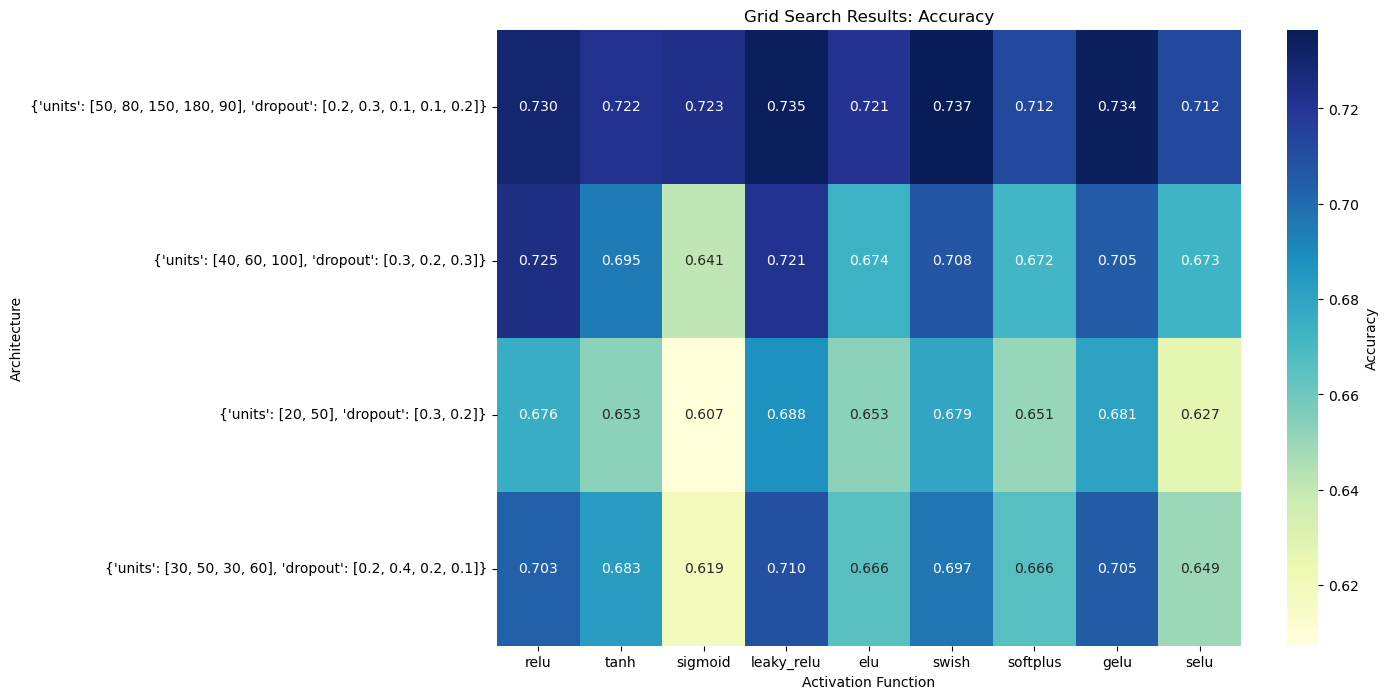

Best Hyperparameters - Architecture: {'units': [50, 80, 150, 180, 90], 'dropout': [0.2, 0.3, 0.1, 0.1, 0.2]}, Activation: swish
Best Accuracy: 0.7365


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid, KFold
import torch
import torch.nn as nn
import torch.optim as optim

# Define parameter grid with different architectures and activations
param_grid = {
    'architecture': [
        {'units': [50, 80, 150, 180, 90], 'dropout': [0.2, 0.3, 0.1, 0.1, 0.2]},  # Architecture 1
        {'units': [40, 60, 100], 'dropout': [0.3, 0.2, 0.3]},  # Architecture 2
        {'units': [20, 50], 'dropout': [0.3, 0.2]},  
        {'units': [30, 50, 30, 60], 'dropout': [0.2, 0.4, 0.2, 0.1]},  # Architecture 3
    ],
    'activation': ['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu', 'swish', 'softplus', 'gelu', 'selu'],
}


# Function to create the model based on architecture and activation
def create_pytorch_model(params):
    layers = []
    
    # Input layer
    layers.append(nn.Linear(train_inputs.shape[1], params['architecture']['units'][0]))
    
    # Hidden layers
    for i, units in enumerate(params['architecture']['units']):
        if i > 0:
            layers.append(nn.Linear(params['architecture']['units'][i-1], units))
        
        # Activation function
        activation = params['activation']
        if activation == 'relu':
            layers.append(nn.ReLU())
        elif activation == 'tanh':
            layers.append(nn.Tanh())
        elif activation == 'sigmoid':
            layers.append(nn.Sigmoid())
        elif activation == 'leaky_relu':
            layers.append(nn.LeakyReLU())
        elif activation == 'elu':
            layers.append(nn.ELU())
        elif activation == 'swish':
            layers.append(nn.SiLU())
        elif activation == 'softplus':
            layers.append(nn.Softplus())
        elif activation == 'gelu':
            layers.append(nn.GELU())
        elif activation == 'selu':
            layers.append(nn.SELU())
        
        # Batch Normalization and Dropout
        layers.append(nn.BatchNorm1d(units))
        layers.append(nn.Dropout(params['architecture']['dropout'][i]))
    
    # Output layer
    layers.append(nn.Linear(params['architecture']['units'][-1], 3))
    layers.append(nn.Softmax(dim=1))  # Softmax for output
    
    model = nn.Sequential(*layers)
    return model

# Function to train and evaluate the model
def train_and_evaluate(model, train_inputs, train_targets, val_inputs, val_targets, learning_rate, max_epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

    for epoch in range(max_epochs):
        model.train()
        outputs = model(train_inputs)
        loss = criterion(outputs, train_targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        history['loss'].append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_targets).item()
            history['val_loss'].append(val_loss)
        
            _, predicted = torch.max(val_outputs, 1)
            correct = (predicted == val_targets).sum().item()
            val_accuracy = correct / val_targets.size(0)
            history['val_accuracy'].append(val_accuracy)

        if (epoch + 1) % 50 == 0:
            print(f"Epoch [{epoch+1}/{max_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")

    # Final accuracy
    outputs = model(val_inputs)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == val_targets).sum().item() / val_targets.size(0)
    
    return history, accuracy

# Function to perform K-fold cross-validation
def k_fold_cross_validation(model_class, train_inputs, train_targets, params, k=5, learning_rate=0.01, max_epochs=1000):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    all_accuracy = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(train_inputs)):
        print(f"Fold {fold + 1}/{k}")
        
        # Create training and validation datasets
        train_x, val_x = train_inputs[train_idx], train_inputs[val_idx]
        train_y, val_y = train_targets[train_idx], train_targets[val_idx]

        # Initialize the model
        model = model_class(params)
        
        # Train and evaluate the model
        history, accuracy = train_and_evaluate(
            model,
            train_x,
            train_y,
            val_x,
            val_y,
            learning_rate=learning_rate,
            max_epochs=max_epochs
        )
        
        all_accuracy.append(accuracy)
        print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")

    # Average accuracy across all folds
    mean_accuracy = np.mean(all_accuracy)
    std_accuracy = np.std(all_accuracy)
    print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    return mean_accuracy

# Create the grid of hyperparameters
grid = ParameterGrid(param_grid)

# Initialize results matrix
results = np.zeros((len(param_grid['activation']), len(param_grid['architecture'])))

# Perform grid search
# Initialize results matrix
num_activations = len(param_grid['activation'])
num_architectures = len(param_grid['architecture'])
results = np.zeros((num_architectures, num_activations))  # rows for architectures, columns for activations

# Perform grid search
for i, params in enumerate(grid):
    print(f"Training with Activation Function: {params['activation']}, Architecture: {params['architecture']}")
    
    # Perform K-fold cross-validation for each set of hyperparameters
    mean_accuracy = k_fold_cross_validation(create_pytorch_model, train_inputs, train_targets, params, k=5, learning_rate=0.01, max_epochs=1000)
    
    # Find the index for the current architecture and activation
    arch_index = param_grid['architecture'].index(params['architecture'])
    act_index = param_grid['activation'].index(params['activation'])
    
    # Store the results
    results[arch_index, act_index] = mean_accuracy

# Visualization of results using a heatmap for all architectures and activations
plt.figure(figsize=(12, 8))
sns.heatmap(results, annot=True, fmt='.3f', 
            xticklabels=param_grid['activation'], 
            yticklabels=[str(arch) for arch in param_grid['architecture']], 
            cmap='YlGnBu', cbar_kws={'label': 'Accuracy'})
plt.xlabel('Activation Function')
plt.ylabel('Architecture')
plt.title('Grid Search Results: Accuracy')
plt.show()

# Find the best hyperparameters
best_params_idx = np.unravel_index(np.argmax(results), results.shape)
best_arch = param_grid['architecture'][best_params_idx[0]]
best_act = param_grid['activation'][best_params_idx[1]]
best_accuracy = results[best_params_idx]

print(f"Best Hyperparameters - Architecture: {best_arch}, Activation: {best_act}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Epoch [100/1000], Loss: 0.7934, Val Loss: 0.8649, Val Accuracy: 67.12%
Epoch [200/1000], Loss: 0.7705, Val Loss: 0.8264, Val Accuracy: 72.01%
Epoch [300/1000], Loss: 0.7349, Val Loss: 0.8191, Val Accuracy: 72.28%
Epoch [400/1000], Loss: 0.7312, Val Loss: 0.8027, Val Accuracy: 73.91%
Epoch [500/1000], Loss: 0.7105, Val Loss: 0.7963, Val Accuracy: 75.82%
Epoch [600/1000], Loss: 0.7055, Val Loss: 0.7769, Val Accuracy: 77.99%
Epoch [700/1000], Loss: 0.7085, Val Loss: 0.7885, Val Accuracy: 75.27%
Epoch [800/1000], Loss: 0.7014, Val Loss: 0.7854, Val Accuracy: 75.54%
Epoch [900/1000], Loss: 0.6938, Val Loss: 0.7723, Val Accuracy: 77.45%
Epoch [1000/1000], Loss: 0.6957, Val Loss: 0.7725, Val Accuracy: 78.26%
Confusion Matrix for the Best Model:
[[241  23  23]
 [ 12 203  63]
 [ 30  45 201]]


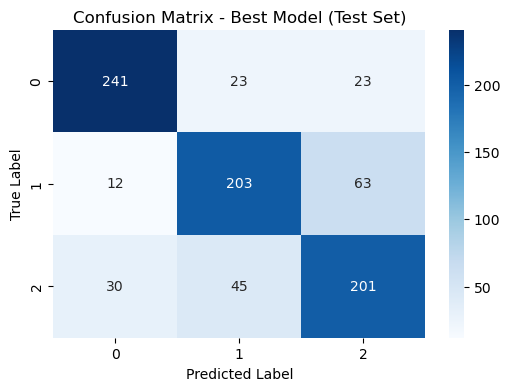

Test Accuracy for the Best Model: 76.69%


In [20]:
# Assuming `best_arch` and `best_act` have been identified from your grid search.

# Create the best model with the selected architecture and activation
best_params = {'architecture': best_arch, 'activation': best_act}
best_model = create_pytorch_model(best_params)

# Train the best model on the full training dataset (train_inputs, train_targets)
train_and_evaluate(best_model, train_inputs, train_targets, val_inputs, val_targets, learning_rate=0.01, max_epochs=1000)

# Evaluate on the test set
best_model.eval()  # Set the model to evaluation mode

# Convert test data to tensor if not already done
test_inputs = torch.tensor(test_scaled_df.values, dtype=torch.float32)
test_targets = torch.tensor(test_labels.values, dtype=torch.long)

with torch.no_grad():
    test_outputs = best_model(test_inputs)
    _, y_pred = torch.max(test_outputs, 1)  # Get the predicted class

# Convert predictions and true labels to numpy arrays
y_pred = y_pred.numpy()
test_targets = test_targets.numpy()

# Compute the confusion matrix
confusion = confusion_matrix(test_targets, y_pred)
print("Confusion Matrix for the Best Model:")
print(confusion)

# Optionally visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Best Model (Test Set)')
plt.show()

# Calculate test accuracy
test_accuracy = accuracy_score(test_targets, y_pred)
print(f'Test Accuracy for the Best Model: {test_accuracy * 100:.2f}%')

Training with Activation Function: relu, Architecture: {'units': [50, 80, 150, 180, 90], 'dropout': [0.2, 0.3, 0.1, 0.1, 0.2]}
Fold 1/5
Epoch [100/500], Loss: 0.8047, Val Loss: 0.8594, Val Accuracy: 68.03%
Epoch [200/500], Loss: 0.7798, Val Loss: 0.8463, Val Accuracy: 69.91%
Epoch [300/500], Loss: 0.7655, Val Loss: 0.8417, Val Accuracy: 70.53%
Epoch [400/500], Loss: 0.7582, Val Loss: 0.8319, Val Accuracy: 71.79%
Epoch [500/500], Loss: 0.7474, Val Loss: 0.8319, Val Accuracy: 71.47%
Fold 1 Accuracy: 0.7147
Fold 2/5
Epoch [100/500], Loss: 0.7971, Val Loss: 0.8597, Val Accuracy: 68.34%
Epoch [200/500], Loss: 0.7854, Val Loss: 0.8452, Val Accuracy: 70.22%
Epoch [300/500], Loss: 0.7680, Val Loss: 0.8476, Val Accuracy: 69.59%
Epoch [400/500], Loss: 0.7446, Val Loss: 0.8430, Val Accuracy: 69.91%
Epoch [500/500], Loss: 0.7448, Val Loss: 0.8363, Val Accuracy: 71.16%
Fold 2 Accuracy: 0.7116
Fold 3/5
Epoch [100/500], Loss: 0.8007, Val Loss: 0.8435, Val Accuracy: 71.16%
Epoch [200/500], Loss: 0.792

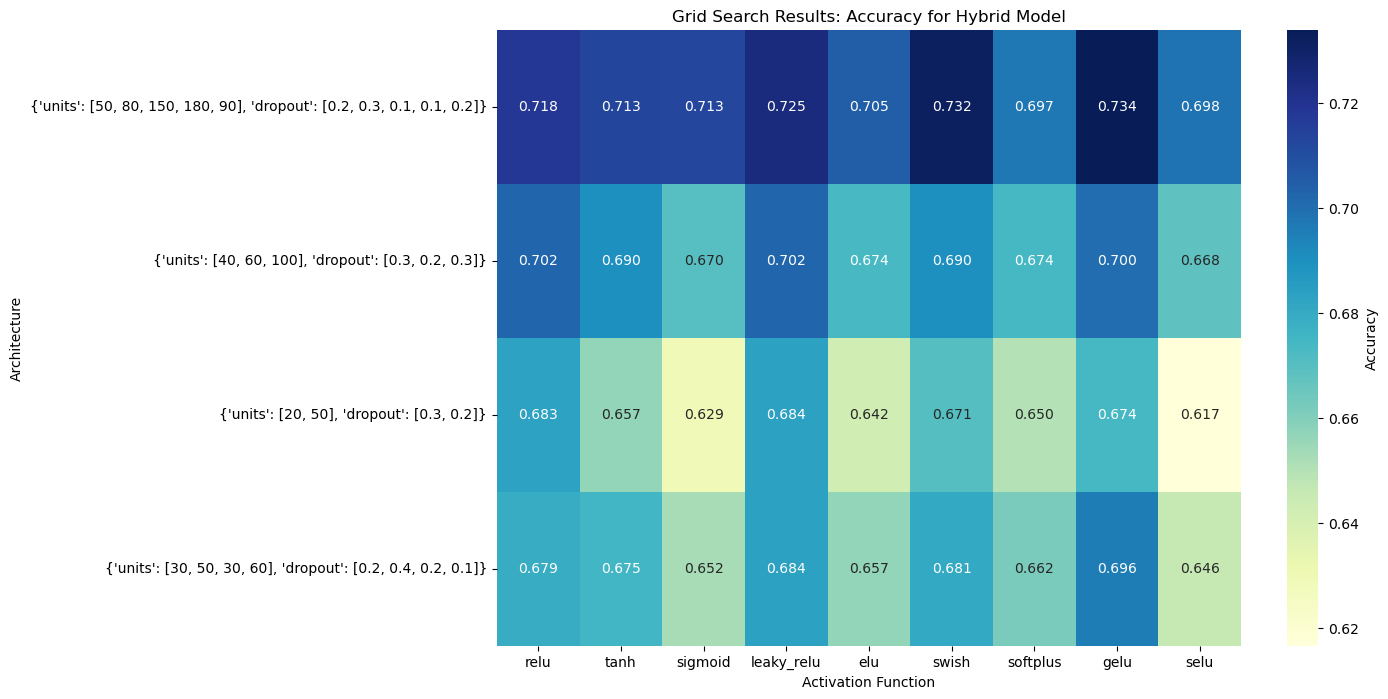

Best Hyperparameters - Architecture: {'units': [50, 80, 150, 180, 90], 'dropout': [0.2, 0.3, 0.1, 0.1, 0.2]}, Activation: gelu
Best Accuracy: 0.7340


In [21]:
# Adjusted hybrid training function
def hybrid_train_and_evaluate(model, train_inputs, train_targets, val_inputs, val_targets, learning_rates, max_epochs):
    # Define multiple optimizers
    optimizers = [
        optim.Rprop(model.parameters(), lr=learning_rates[0]),
        optim.Adam(model.parameters(), lr=learning_rates[1])
    ]
    
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

    for epoch in range(max_epochs):
        model.train()
        outputs = model(train_inputs)
        loss = criterion(outputs, train_targets)

        # Zero gradients for both optimizers
        for optimizer in optimizers:
            optimizer.zero_grad()

        loss.backward()

      
        total_gradients = [param.grad.clone() for param in model.parameters()]
        for optimizer in optimizers:
            for i, param in enumerate(model.parameters()):
                param.grad = total_gradients[i]
            optimizer.step()

        history['loss'].append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_targets).item()
            history['val_loss'].append(val_loss)

            _, predicted = torch.max(val_outputs, 1)
            correct = (predicted == val_targets).sum().item()
            val_accuracy = correct / val_targets.size(0)
            history['val_accuracy'].append(val_accuracy)

        if (epoch + 1) % 50 == 0:
            print(f"Epoch [{epoch+1}/{max_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")

    outputs = model(val_inputs)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == val_targets).sum().item() / val_targets.size(0)
    
    return history, accuracy


# Adjust the K-fold cross-validation to use the hybrid training
def k_fold_cross_validation_hybrid(model_class, train_inputs, train_targets, params, k=5, learning_rates=[0.01, 0.01], max_epochs=1000):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    all_accuracy = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(train_inputs)):
        print(f"Fold {fold + 1}/{k}")
        
        # Create training and validation datasets
        train_x, val_x = train_inputs[train_idx], train_inputs[val_idx]
        train_y, val_y = train_targets[train_idx], train_targets[val_idx]

        # Initialize the model with the specific hyperparameters
        model = model_class(params)

        # Train and evaluate the hybrid model
        history, accuracy = hybrid_train_and_evaluate(
            model,
            train_x,
            train_y,
            val_x,
            val_y,
            learning_rates=learning_rates,
            max_epochs=max_epochs
        )

        all_accuracy.append(accuracy)
        print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")

    mean_accuracy = np.mean(all_accuracy)
    std_accuracy = np.std(all_accuracy)
    print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    return mean_accuracy

# Perform the grid search and cross-validation using the hybrid training model
results = np.zeros((num_architectures, num_activations))

for i, params in enumerate(grid):
    print(f"Training with Activation Function: {params['activation']}, Architecture: {params['architecture']}")

    # Perform K-fold cross-validation for each set of hyperparameters using hybrid model training
    mean_accuracy = k_fold_cross_validation_hybrid(
        create_pytorch_model, 
        train_inputs, 
        train_targets, 
        params, 
        k=5, 
        learning_rates=[0.01, 0.01],  # Two learning rates for hybrid training
        max_epochs=500
    )

    arch_index = param_grid['architecture'].index(params['architecture'])
    act_index = param_grid['activation'].index(params['activation'])

    results[arch_index, act_index] = mean_accuracy

# Visualization of the results
plt.figure(figsize=(12, 8))
sns.heatmap(results, annot=True, fmt='.3f', 
            xticklabels=param_grid['activation'], 
            yticklabels=[str(arch) for arch in param_grid['architecture']], 
            cmap='YlGnBu', cbar_kws={'label': 'Accuracy'})
plt.xlabel('Activation Function')
plt.ylabel('Architecture')
plt.title('Grid Search Results: Accuracy for Hybrid Model')
plt.show()

# Output the best hyperparameters
best_params_idx = np.unravel_index(np.argmax(results), results.shape)
best_arch = param_grid['architecture'][best_params_idx[0]]
best_act = param_grid['activation'][best_params_idx[1]]
best_accuracy = results[best_params_idx]

print(f"Best Hyperparameters - Architecture: {best_arch}, Activation: {best_act}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Epoch [100/1000], Loss: 0.8165, Val Loss: 0.8395, Val Accuracy: 69.84%
Epoch [200/1000], Loss: 0.7919, Val Loss: 0.8286, Val Accuracy: 71.20%
Epoch [300/1000], Loss: 0.7672, Val Loss: 0.8198, Val Accuracy: 72.28%
Epoch [400/1000], Loss: 0.7580, Val Loss: 0.8240, Val Accuracy: 71.20%
Epoch [500/1000], Loss: 0.7503, Val Loss: 0.8147, Val Accuracy: 73.10%
Epoch [600/1000], Loss: 0.7360, Val Loss: 0.7918, Val Accuracy: 75.00%
Epoch [700/1000], Loss: 0.7343, Val Loss: 0.7930, Val Accuracy: 74.18%
Epoch [800/1000], Loss: 0.7240, Val Loss: 0.7926, Val Accuracy: 75.00%
Epoch [900/1000], Loss: 0.7126, Val Loss: 0.7832, Val Accuracy: 76.63%
Epoch [1000/1000], Loss: 0.7185, Val Loss: 0.7831, Val Accuracy: 76.36%
Confusion Matrix for the Best Model:
[[234  25  28]
 [ 11 203  64]
 [ 15  61 200]]


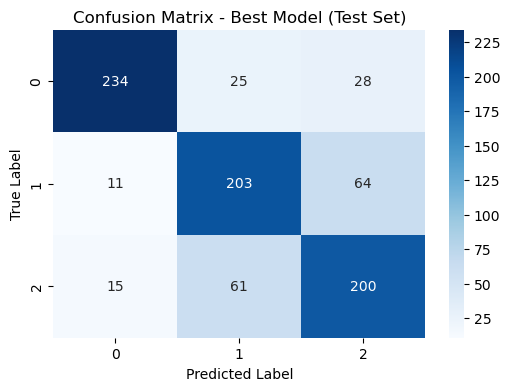

Test Accuracy for the Best Model: 75.74%


In [22]:
# Assuming `best_arch` and `best_act` have been identified from your grid search.

# Create the best model with the selected architecture and activation
best_params = {'architecture': best_arch, 'activation': best_act}
best_model = create_pytorch_model(best_params)

# Train the best model on the full training dataset (train_inputs, train_targets)
hybrid_train_and_evaluate(best_model, train_inputs, train_targets, val_inputs, val_targets,learning_rates=[0.01, 0.01], max_epochs=1000)

# Evaluate on the test set
best_model.eval()  # Set the model to evaluation mode

# Convert test data to tensor if not already done
test_inputs = torch.tensor(test_scaled_df.values, dtype=torch.float32)
test_targets = torch.tensor(test_labels.values, dtype=torch.long)

with torch.no_grad():
    test_outputs = best_model(test_inputs)
    _, y_pred = torch.max(test_outputs, 1)  # Get the predicted class

# Convert predictions and true labels to numpy arrays
y_pred = y_pred.numpy()
test_targets = test_targets.numpy()

# Compute the confusion matrix
confusion = confusion_matrix(test_targets, y_pred)
print("Confusion Matrix for the Best Model:")
print(confusion)

# Optionally visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Best Model (Test Set)')
plt.show()

# Calculate test accuracy
test_accuracy = accuracy_score(test_targets, y_pred)
print(f'Test Accuracy for the Best Model: {test_accuracy * 100:.2f}%')